# **Diseño de Experimentos**

[Victor Sanchez](https://github.com/VicoSan07) <br>
Dataset: [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality) 

### **Objetivo**

Realizar un diseño de experimentos de un factor sobre los modelos de regresión.

### **Carga de Dataset**

In [1]:
import pandas as pd

#Carga de dataset 'vino rojo' 
dfwiner = pd.read_csv(r'C:/Users/vicos/Documents/winequality-red.csv',delimiter=";",
                      #Tipo de datos en cada columna
                      dtype={
                          'fixed acidity': float,
                          'volatile acidity': float,
                          'citric acid': float,
                          'residual sugar': float,
                          'chlorides': float,
                          'free sulfur dioxide': float,
                          'total sulfur dioxide': float,
                          'density': float,
                          'pH': float,
                          'sulphates': float,
                          'alcohol': float,
                          'quality': int,
                      })

#Carga de dataset 'vino blanco' 
dfwinew = pd.read_csv(r'C:/Users/vicos/Documents/winequality-white.csv',delimiter=";",
                      #Tipo de datos en cada columna
                      dtype={
                          'fixed acidity': float,
                          'volatile acidity': float,
                          'citric acid': float,
                          'residual sugar': float,
                          'chlorides': float,
                          'free sulfur dioxide': float,
                          'total sulfur dioxide': float,
                          'density': float,
                          'pH': float,
                          'sulphates': float,
                          'alcohol': float,
                          'quality': int,
                      })

# Crear columnas con string constante en cada fila
dfwiner['type']='red'
dfwinew['type']='white'

dfwineall = pd.concat([dfwiner,dfwinew],ignore_index=True)
dfwineall = dfwineall.drop(columns=["type"])

# Renombramos los nombres de las variables para facilitar su representación visual
dfwineall.rename(
    columns={"fixed acidity": "FA",
            "volatile acidity": "VA",
             "citric acid": "CA",
             "residual sugar": "RS",
             "chlorides": "CH",
             "free sulfur dioxide": "FSD",
             "total sulfur dioxide": "TSD",
             "density": "DE",
             "pH": "PH",
             "sulphates": "SU",
             "alcohol": "AL",
             "quality": "QU"},
    inplace=True,
)

dfwineall

,FA,VA,CA,RS,CH,FSD,TSD,DE,PH,SU,AL,QU
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


A partir de aquí vamos a partir los datos en 2 conjuntos: variables independientes y variable dependiente. Posteriormente partiremos estos dos conjuntos en _train_ y _test_ para evaluar el desempeño del modelo.

In [2]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X=dfwineall.iloc[:,:-1]
Y=dfwineall.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X.values,Y.values,test_size=0.2,random_state=0)

### **Regresión Lineal Múltiple**

Aplicamos la regresión lineal

In [3]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train,Y_train)
Y_prediction=regressor.predict(X_test)

### **Random Forest Regressor**


In [4]:
# Aplicación Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RFC = RandomForestRegressor(n_estimators=100)
RFC.fit(X_train,Y_train)

Y3_prediction = RFC.predict(X_test)

### **Diseño de Experimentos**

In [5]:
# Factor 1: Modelos, 2 niveles
# Respuesta: Calidad vino
MLR_df = pd.DataFrame(abs(Y_test-Y_prediction))
MLR_df['Modelo']='MLR'

RFR_df = pd.DataFrame(abs(Y_test-Y3_prediction))
RFR_df['Modelo']='RFR'

DOE_df = pd.concat([MLR_df,RFR_df])
DOE_df.rename(columns={0: 'Error', 'Modelo': 'Modelo'},inplace=True)

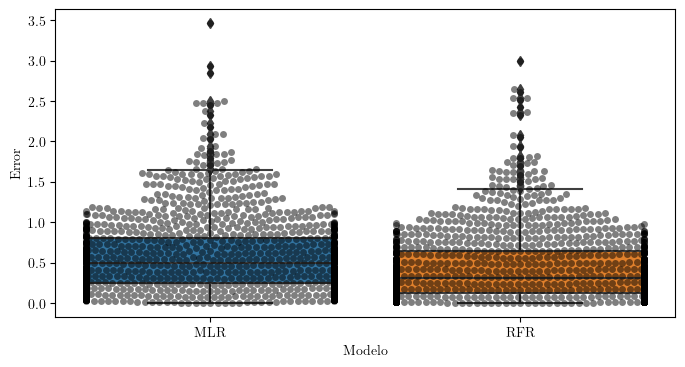

In [7]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="Modelo", y="Error", data=DOE_df, ax=ax)
sns.swarmplot(x="Modelo", y="Error", data=DOE_df, color='black', alpha = 0.5, ax=ax);
#plt.savefig('DOE_Regresion.png',dpi=400)

### **Conclusiones**

A tráves del diseño de experimentos se puede comparar los modelos realizados, partícularmente sus errores absolutos sobre los datos observados.